In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import session_info
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

In [8]:
session_info.show()

In [9]:
%matplotlib inline

sns.set_style('darkgrid')

## Load the Data

In [10]:
train = pd.read_csv('C:/Users/lenovo/Desktop/test.csv')
test = pd.read_csv('C:/Users/lenovo/Desktop/train.csv')

passengers = pd.concat([train, test], sort=False)

passengers.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN


## Clean the Data

In [11]:
passengers.Sex.unique()

array(['male', 'female'], dtype=object)

Replace the sex column with a numerical column, 1: male; 2: female

In [12]:
passengers['Sex'] = passengers['Sex'].replace({'male': 1, 'female': 0})
passengers.head()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10628\205202881.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  passengers['Sex'] = passengers['Sex'].replace({'male': 1, 'female': 0})


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S,NaN
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q,NaN
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S,NaN


In [13]:
passengers.Age.values

array([34.5, 47. , 62. , ...,  nan, 26. , 32. ])

Age column has missing values. Replace the missing values with the median age.

In [14]:
passengers.Age.mean()

29.881137667304014

In [15]:
passengers.Age.fillna(passengers.Age.mean(), inplace=True)
passengers.Age.unique()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10628\3198656144.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  passengers.Age.fillna(passengers.Age.mean(), inplace=True)


array([34.5       , 47.        , 62.        , 27.        , 22.        ,
       14.        , 30.        , 26.        , 18.        , 21.        ,
       29.88113767, 46.        , 23.        , 63.        , 24.        ,
       35.        , 45.        , 55.        ,  9.        , 48.        ,
       50.        , 22.5       , 41.        , 33.        , 18.5       ,
       25.        , 39.        , 60.        , 36.        , 20.        ,
       28.        , 10.        , 17.        , 32.        , 13.        ,
       31.        , 29.        , 28.5       , 32.5       ,  6.        ,
       67.        , 49.        ,  2.        , 76.        , 43.        ,
       16.        ,  1.        , 12.        , 42.        , 53.        ,
       26.5       , 40.        , 61.        , 60.5       ,  7.        ,
       15.        , 54.        , 64.        , 37.        , 34.        ,
       11.5       ,  8.        ,  0.33      , 38.        , 57.        ,
       40.5       ,  0.92      , 19.        , 36.5       ,  0.75

In [16]:
passengers['FirstClass'] = passengers['Pclass'].apply(
    lambda x: 1 if x == 1 else 0)
passengers.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,FirstClass
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q,NaN,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S,NaN,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q,NaN,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S,NaN,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S,NaN,0


In [17]:
passengers['SecondClass'] = passengers['Pclass'].apply(
    lambda x: 1 if x == 2 else 0)

passengers.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,FirstClass,SecondClass
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q,NaN,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S,NaN,0,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q,NaN,0,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S,NaN,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S,NaN,0,0


In [18]:
passengers['Survived'] = passengers['Survived'].dropna().astype(int)


In [19]:
passengers['Survived'].unique()

array([0, 1])

## Split the Data

In [20]:
features = passengers[['Sex', 'Age', 'FirstClass', 'SecondClass']]
survival = passengers['Survived']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(features, survival, test_size=0.2)

## Normalize the Data

In [22]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Create the Model

In [23]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [24]:
model.score(x_train, y_train)

0.7163323782234957

In [25]:
model.score(x_test, y_test)

0.7061068702290076

In [26]:
print(list(zip(['Sex','Age','FirstClass','SecondClass'],model.coef_[0])))

[('Sex', -0.6690393003050777), ('Age', -0.31939180049235816), ('FirstClass', 0.503010978083709), ('SecondClass', 0.3246102861608369)]


## Predict

In [27]:
Jack = np.array([1, 20.0, 0, 0])
Rose = np.array([0, 17.0, 1, 0])
You = np.array([1, 18.0, 0, 1])

sample_passengers = np.array([Jack, Rose, You])

In [28]:
sample_passengers = scaler.transform(sample_passengers)

C:\Users\lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [29]:
model.predict(sample_passengers)

array([0, 1, 0])

In [30]:
model.predict_proba(sample_passengers)

array([[0.77668538, 0.22331462],
       [0.19825329, 0.80174671],
       [0.60244953, 0.39755047]])

In [31]:
print(model.predict_proba(sample_passengers)[:,1]) # probability of survival

[0.22331462 0.80174671 0.39755047]


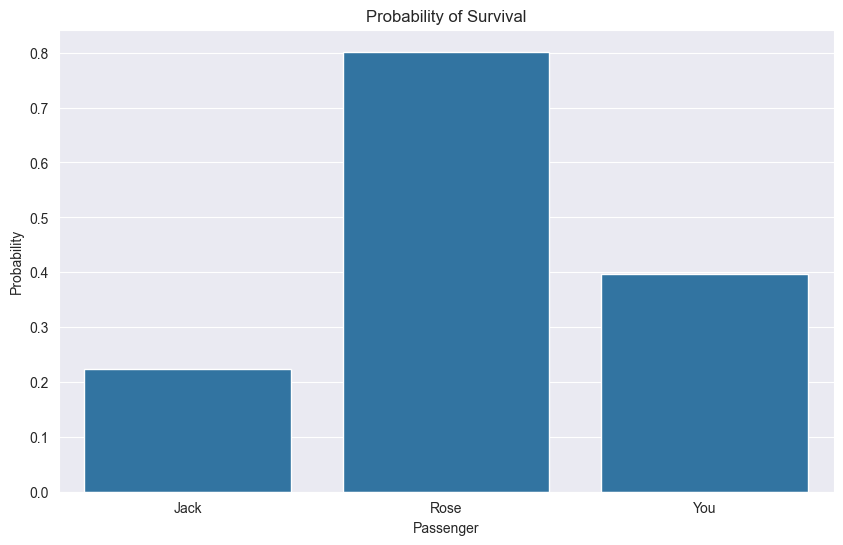

In [32]:
plt.figure(figsize=(10, 6))

(
    sns.barplot(
        x=['Jack', 'Rose', 'You'],
        y=model.predict_proba(sample_passengers)[:,1]
    )
    .set_title('Probability of Survival')
)

plt.xlabel('Passenger')
plt.ylabel('Probability')

plt.show()

In [33]:
confusion_matrix(y_test, model.predict(x_test))

array([[139,  22],
       [ 55,  46]], dtype=int64)

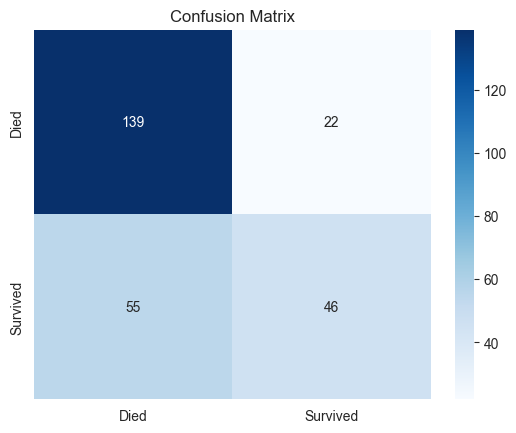

In [34]:
matrix = confusion_matrix(y_test, model.predict(x_test))

(
    sns.heatmap(
        matrix,
        annot=True,
        fmt='d',
        xticklabels=['Died', 'Survived'],
        yticklabels=['Died', 'Survived'],
        cmap='Blues'
    )
)

# plt.xlabel('Predicted')
# plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [35]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])

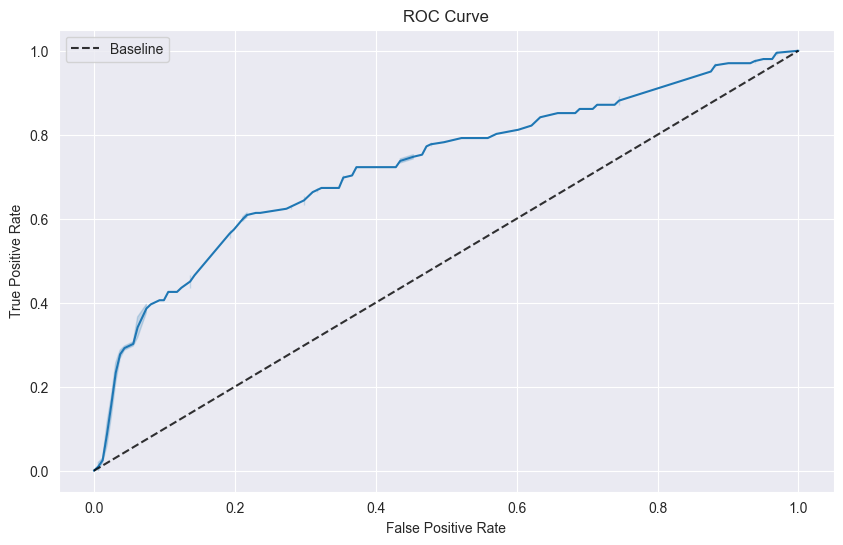

In [36]:
plt.figure(figsize=(10, 6))

sns.lineplot(x=fpr, y=tpr)
plt.plot([0, 1], [0, 1], color='black', linestyle='--', label='Baseline', alpha=0.8)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend()
plt.show()

In [37]:
roc_auc = roc_auc_score(y_test, model.predict_proba(x_test)[:,1])
print(f'ROC AUC Score: {roc_auc}')

ROC AUC Score: 0.7251091568784207


In [38]:
report = classification_report(y_test, model.predict(x_test))
print(report)

              precision    recall  f1-score   support

           0       0.72      0.86      0.78       161
           1       0.68      0.46      0.54       101

    accuracy                           0.71       262
   macro avg       0.70      0.66      0.66       262
weighted avg       0.70      0.71      0.69       262



In [39]:
with open('C:/Users/lenovo/Desktop/report.txt', 'w') as f:
    f.write(report)

FileNotFoundError: [Errno 2] No such file or directory: 'results/report.txt'